In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data/df_fe.csv', sep=",")
#df['Date'] = pd.to_datetime(df['Date'])

#df.drop(index=1, inplace=True)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
0,25.764999,25.934999,25.6800,25.825001,22.956745,214256000,AAPL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,2
1,25.775000,25.799999,24.6450,24.735001,21.987814,501684000,AAPL,-0.042207,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,3
2,24.712500,25.022499,24.4475,24.530001,21.805574,342872000,AAPL,-0.008288,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,4


In [3]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72176 entries, 0 to 72175
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    72176 non-null  float64
 1   High                    72176 non-null  float64
 2   Low                     72176 non-null  float64
 3   Close                   72176 non-null  float64
 4   Adj Close               72176 non-null  float64
 5   Volume($)               72176 non-null  int64  
 6   Symbol                  72176 non-null  object 
 7   Daily Return            72146 non-null  float64
 8   SMA_30                  71306 non-null  float64
 9   SMA_60                  70406 non-null  float64
 10  SMA_90                  69506 non-null  float64
 11  EMA_30                  72176 non-null  float64
 12  EMA_60                  72176 non-null  float64
 13  EMA_90                  72176 non-null  float64
 14  RSI                     71786 non-null

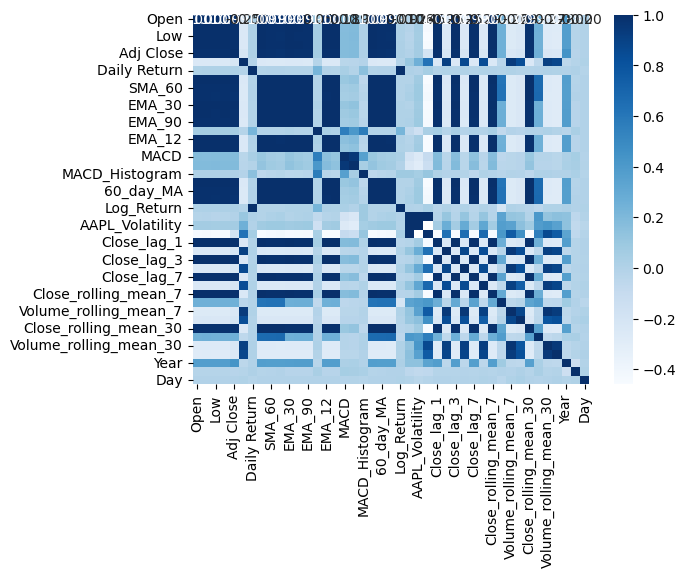

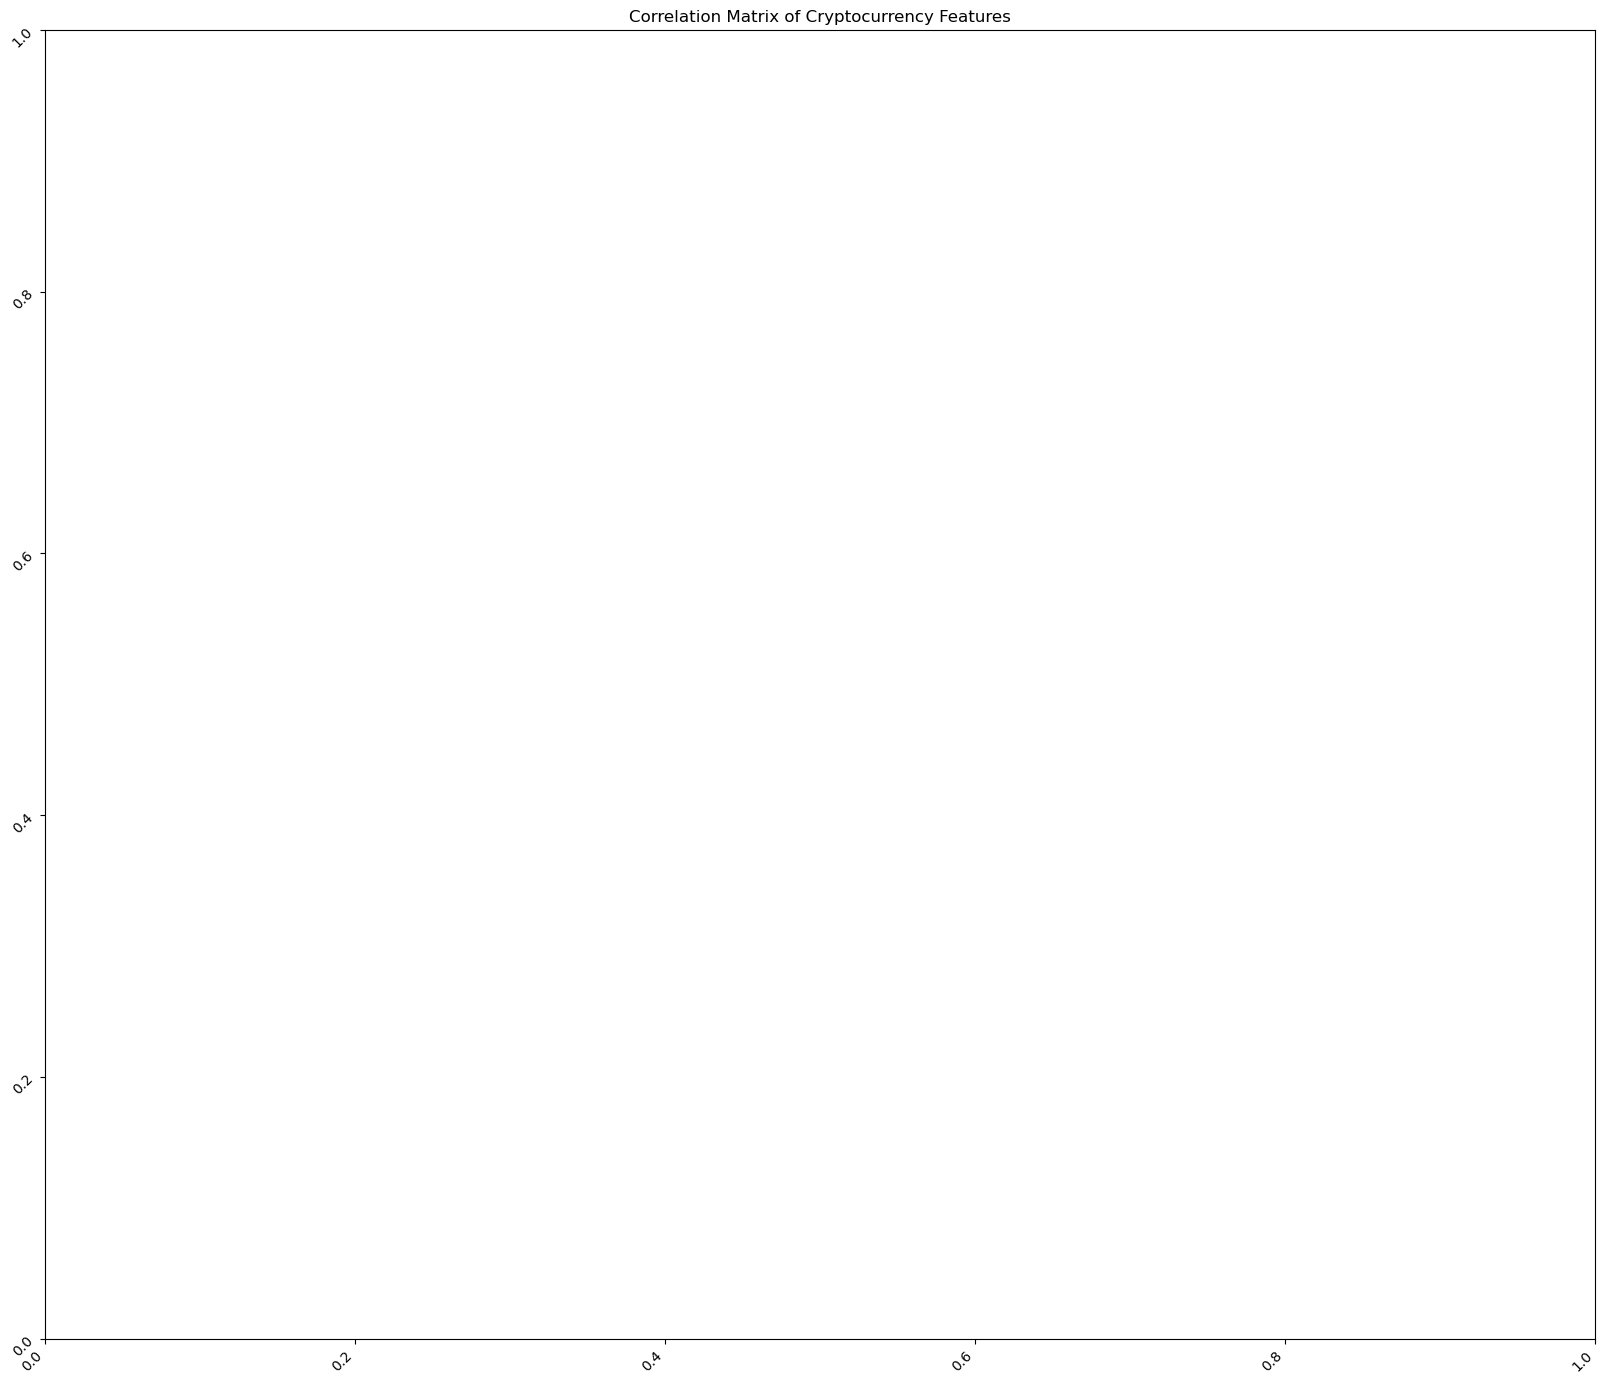

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation analysis
df_numerical = df.select_dtypes(include=['float64', 'int64'])


corr = df_numerical.corr()


sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")

plt.figure(figsize=(20, 17))
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.title("Correlation Matrix of Cryptocurrency Features")
plt.show()

#### onehotencoding 

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

artists_column = df['Symbol'].values.reshape(-1, 1)

one_hot_encoded_artists = one_hot_encoder.fit_transform(artists_column)

df['Symbol'] = np.argmax(one_hot_encoded_artists, axis=1)

d:\Anaconda\envs\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Feature Importance

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

#df['Date'] = pd.to_datetime(df['Date'])


X = df.drop('Close', axis=1) 
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier if it's a classification task


# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importance_df)


AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


NameError: name 'importance_df' is not defined

<Figure size 1000x800 with 0 Axes>

#### Recursive Feature Elimination (RFE):
RFE is a technique that fits a model and removes the weakest feature (or features) until the specified number of features is reached. How can I perform 

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(random_state=42)

# Initialize RFE with the estimator and the desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1) 
selector = selector.fit(X_train, y_train)
 
selected_features_mask = selector.support_

feature_ranking = selector.ranking_

# Transform the dataset to the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
 
selected_features = X_train.columns[selected_features_mask]
print(f"Selected features: {selected_features}")

# And to see the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})
print(ranking_df.sort_values(by='Ranking'))


ValueError: Input X contains NaN.
RFE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### PCA test

##### reduce redundancy 

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA. For example, to keep 95% of variance, set n_components to 0.95
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Interpret the results
print(f"Number of components to explain 95% variance: {pca.n_components_}")
print(f"Explained variance by component: {pca.explained_variance_ratio_}")

# 'X_pca' is the transformed data with reduced dimensions


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X

,Open,High,Low,Adj Close,Volume($),Symbol,Daily Return,SMA_30,SMA_60,SMA_90,...,Close_rolling_std_7,Volume_rolling_mean_7,Volume_rolling_std_7,Close_rolling_mean_30,Close_rolling_std_30,Volume_rolling_mean_30,Volume_rolling_std_30,Year,Month,Day
0,28994.009766,29600.626953,28803.585938,29374.152344,40730301359,3,0.012842,22428.243750,19715.608773,17188.618815,...,1284.059118,4.970113e+10,8.115395e+09,22428.243750,3661.566866,3.886562e+10,1.223869e+10,2021,1,1
1,29376.455078,33155.117188,29091.181641,32127.267578,67865420765,3,0.093726,22850.972721,20018.558219,17427.037533,...,1936.633106,5.249153e+10,1.055716e+10,22850.972721,4019.854985,4.006346e+10,1.325301e+10,2021,1,2
2,32129.408203,34608.558594,32052.316406,32782.023438,78665235202,3,0.020380,23320.381315,20329.363493,17671.356239,...,2189.909798,5.423229e+10,1.376529e+10,23320.381315,4328.735995,4.155655e+10,1.494648e+10,2021,1,3
3,32810.949219,33440.218750,28722.755859,31971.914062,81163475344,3,-0.024712,23747.637435,20602.564583,17908.772993,...,2063.049095,5.881897e+10,1.677368e+10,23747.637435,4531.181152,4.335392e+10,1.634268e+10,2021,1,4
4,31977.041016,34437.589844,30221.187500,33992.429688,67547324782,3,0.063197,24235.881055,20909.673730,18167.922559,...,2060.489590,6.200202e+10,1.586251e+10,24235.881055,4820.354256,4.476237e+10,1.655196e+10,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,2.143799,2.163639,2.101517,2.160291,4133447,10,0.011708,2.055781,2.129682,2.179435,...,0.048673,4.828611e+06,3.207028e+06,2.055781,0.056420,5.057321e+06,6.574886e+06,2024,2,16
16040,2.159645,2.638445,2.156239,2.587086,170975160,10,0.197564,2.069408,2.137288,2.182912,...,0.191588,2.900185e+07,6.267185e+07,2.069408,0.110488,9.749322e+06,3.078794e+07,2024,2,17
16041,2.592313,2.732283,2.424762,2.539670,127117928,10,-0.018328,2.083711,2.143002,2.186221,...,0.229593,4.639731e+07,7.131584e+07,2.083711,0.139868,1.378169e+07,3.749190e+07,2024,2,18
16042,2.544140,2.547866,2.418916,2.425865,27400641,10,-0.044811,2.092877,2.146604,2.189637,...,0.226629,4.870266e+07,7.024358e+07,2.092877,0.152832,1.464284e+07,3.749834e+07,2024,2,19


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your data

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# variance tells you how much information (variance) can be attributed to each principal component
print(pca.explained_variance_ratio_)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
X_train_pca

NameError: name 'X_train_pca' is not defined